# Function integration using the Monte Carlo method

## Imports and configuration

In [1]:
import numpy as np
from scipy.integrate import quad
from sympy import symbols, integrate, exp
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

# Set global configuration
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 14,
    'axes.xmargin': 0,
    'axes.ymargin': 0
})

## Example: Gaussian Function

In [2]:
def f_gauss(x, a=0.4, b=0, c=1):
    """Gaussian function
    Has closed-form analytical solutions for the integral
    x : independent variable
    a, b, c : function parameters
    """
    return a * np.exp(-(x-b)**2 / 2*c**2)

# Integer range
INT_RANGE = (-4, 4)

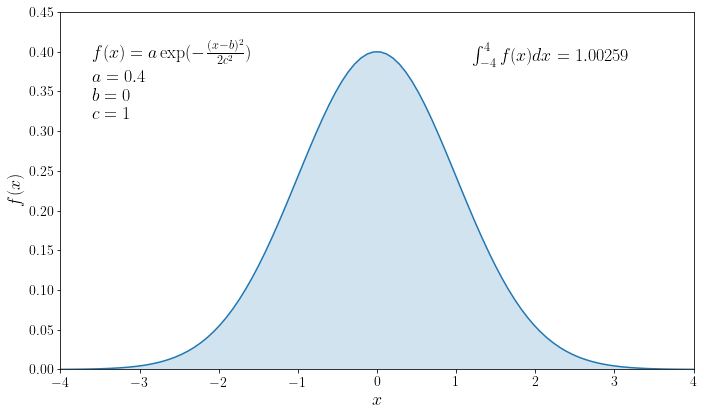

In [3]:
# Plot Gaussian function
x = np.linspace(INT_RANGE[0], INT_RANGE[1], 100)
y = f_gauss(x)

figsize(10, 6)
plt.plot(x, y, '-')
plt.fill_between(x, y, alpha=0.2)
plt.ylim(top=0.45)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x)$', fontsize=18)
plt.annotate('$f(x) = a \exp(-\\frac{(x-b)^2}{2c^2})$ \n $a = 0.4$ \n $b = 0$ \n $c = 1$', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=18);
plt.annotate('$\int_{-4}^{4} f(x) dx = 1.00259$', xy=(0.65, 0.85), xycoords='axes fraction', fontsize=18);
plt.tight_layout()
plt.savefig('figures/monte-carlo-integration-gaussian.png')

### Analytic solution

In [4]:
# Check analytic solution
x = symbols('x')
func = 0.4 * exp(-(x-0)**2 / 2*1**2)
expr = integrate(func, (x, -4, 4))
integral_f_gauss_analyt = expr.evalf()
print('Analytical solution of integral:', integral_f_gauss_analyt)

Analytical solution of integral: 1.00258779942818


## Calculate the integral

In [5]:
# Calculate integral in [-4, 4] using trapezoid rule
N = 1000

x = np.linspace(INT_RANGE[0], INT_RANGE[1], N)
y = f_gauss(x)
integral_f_gauss_trapz = np.trapz(y, x=x)

print("Integral using the Trapezoid Rule:", integral_f_gauss_trapz)

Integral using the Trapezoid Rule: 1.0025877936915661


In [6]:
# Calculate integral in [-4, 4] using numerical quadrature
N = 1000

integral_f_gauss_quad = quad(f_gauss, INT_RANGE[0], INT_RANGE[1])

print("Integral using the numerical quadrature:", integral_f_gauss_quad)

Integral using the numerical quadrature: (1.002587799428183, 4.851732663790606e-12)


In [7]:
# Calculate integral in [-4, 4] using Monte Carlo method
N = 1000000

x_points = [np.random.uniform(-4, 4) for _ in range(N)]
f_x = [f_gauss(x) for x in x_points]
V = INT_RANGE[1] - INT_RANGE[0]
integral_f_gauss_montecarlo = sum(f_x) * V / N

print('Integral using the Monte Carlo method:', integral_f_gauss_montecarlo)

Integral using the numerical quadrature: 1.0022406995836632


## Convergence of the Monte Carlo method

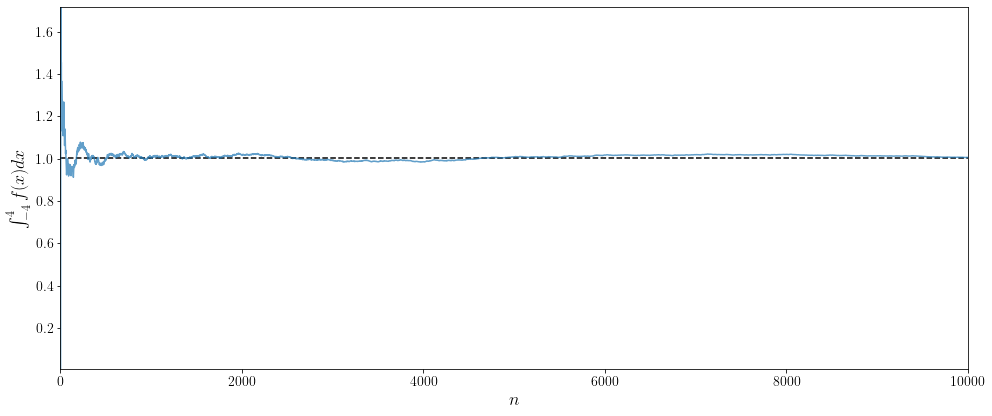

In [11]:
N = 10000
n = np.arange(1, N+1)
integral_val = [sum(f_x[0:i])*V/i for i in n]

figsize(14, 6)
plt.plot([0, N], [integral_f_gauss_analyt, integral_f_gauss_analyt], '--k')
plt.plot(n, integral_val, alpha=0.7)
plt.xlabel('$n$', fontsize=18)
plt.ylabel('$\int_{-4}^{4} f(x) dx$', fontsize=18)
plt.tight_layout()
plt.savefig('figures/monte-carlo-integration-convergence.png')